In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
from itertools import cycle
from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
%matplotlib inline

In [118]:
inf = pd.read_csv('ProPublica_COMPAS_preprocessed.csv')

In [119]:
X=inf.iloc[:,1:12].values
y=inf.iloc[:,12].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
'''
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  
'''
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)
#print(classification_report(y_test,y_pred))  
print("accuracy = %f" % accuracy_score(y_test, y_pred))
print("f1_score = %f" % f1_score(y_test, y_pred, average='binary'))

accuracy = 0.650960
f1_score = 0.463807


Feature ranking:
1. p_current_age (0.282375)
2. p_charge (0.280407)
3. p_age_first_offence (0.262924)
4. p_probation (0.070524)
5. p_prison (0.037182)
6. race_black (0.020276)
7. race_white (0.018522)
8. race_hispanic (0.012949)
9. p_jail30 (0.010928)
10. race_asian (0.002111)
11. race_native (0.001800)


<function matplotlib.pyplot.show(*args, **kw)>

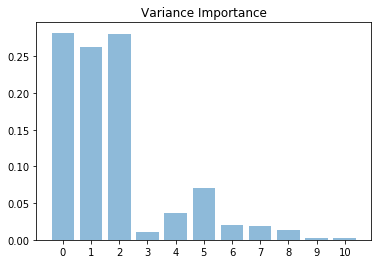

In [120]:
# Calculate feature importances
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
string=['p_current_age','p_age_first_offence','p_charge','p_jail30','p_prison','p_probation','race_black','race_white','race_hispanic','race_asian','race_native']
for f in range(X_train.shape[1]):
    n=indices[f]
    print("%d. %s (%f)" % (f + 1, string[n], importances[indices[f]]))
y_pos = np.arange(len(string))    
plt.bar(y_pos, importances, align='center', alpha=0.5)
plt.xticks(y_pos)
plt.title('Variance Importance')
plt.show

Feature ranking:
1. p_age_first_offence (0.605745)
2. p_probation (0.171437)
3. p_prison (0.110028)
4. race_black (0.035844)
5. p_jail30 (0.033216)
6. race_white (0.021509)
7. race_hispanic (0.015034)
8. race_asian (0.004143)
9. race_native (0.003042)


<function matplotlib.pyplot.show(*args, **kw)>

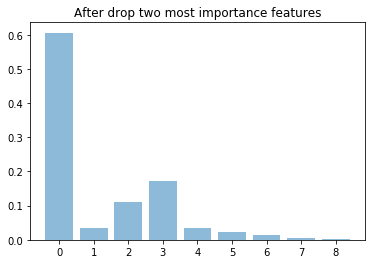

In [121]:
inf = pd.read_csv('ProPublica_COMPAS_preprocessed.csv')
# dropping passed columns 
inf.drop(["p_current_age", "p_charge"], axis = 1, inplace = True) 
X=inf.iloc[:,1:10].values
y=inf.iloc[:,10].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
'''
# Feature Scaling

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  
'''
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
# Calculate feature importances
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
string=['p_age_first_offence', 'p_jail30','p_prison','p_probation','race_black','race_white','race_hispanic','race_asian','race_native']
for f in range(X_train.shape[1]):
    n=indices[f]
    print("%d. %s (%f)" % (f + 1, string[n], importances[indices[f]]))
y_pos = np.arange(len(string))    
plt.bar(y_pos, importances, align='center', alpha=0.5)
plt.xticks(y_pos)
plt.title('After drop two most importance features')
plt.show

Feature ranking:
1. p_age_first_offence (0.422618)
2. p_charge (0.362195)
3. p_probation (0.092793)
4. p_prison (0.050940)
5. race_black (0.021434)
6. race_white (0.018015)
7. p_jail30 (0.014603)
8. race_hispanic (0.012783)
9. race_asian (0.002449)
10. race_native (0.002171)


<function matplotlib.pyplot.show(*args, **kw)>

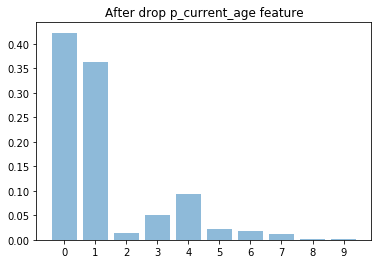

In [122]:
inf = pd.read_csv('ProPublica_COMPAS_preprocessed.csv')
# dropping passed columns 
inf.drop(["p_current_age"], axis = 1, inplace = True) 
X=inf.iloc[:,1:11].values
y=inf.iloc[:,11].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
'''
# Feature Scaling

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  
'''
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
# Calculate feature importances
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

string=['p_age_first_offence', 'p_charge','p_jail30','p_prison','p_probation','race_black','race_white','race_hispanic','race_asian','race_native']
for f in range(X_train.shape[1]):
    n=indices[f]
    print("%d. %s (%f)" % (f + 1, string[n], importances[indices[f]]))
y_pos = np.arange(len(string))    
plt.bar(y_pos, importances, align='center', alpha=0.5)
plt.xticks(y_pos)
plt.title('After drop p_current_age feature')
plt.show

Feature ranking:
1. p_current_age (0.393186)
2. p_age_first_offence (0.367712)
3. p_probation (0.107939)
4. p_prison (0.058216)
5. race_black (0.021874)
6. race_white (0.017807)
7. p_jail30 (0.015752)
8. race_hispanic (0.012853)
9. race_asian (0.002670)
10. race_native (0.001990)


<function matplotlib.pyplot.show(*args, **kw)>

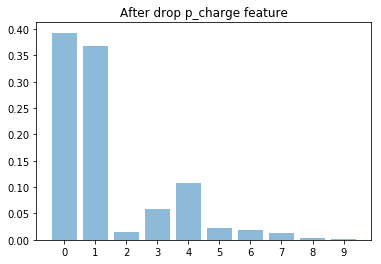

In [123]:
inf = pd.read_csv('ProPublica_COMPAS_preprocessed.csv')
# dropping passed columns 
inf.drop(["p_charge"], axis = 1, inplace = True) 
X=inf.iloc[:,1:11].values
y=inf.iloc[:,11].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
'''
# Feature Scaling

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  
'''
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
# Calculate feature importances
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
string=['p_current_age','p_age_first_offence','p_jail30','p_prison','p_probation','race_black','race_white','race_hispanic','race_asian','race_native']
for f in range(X_train.shape[1]):
    n=indices[f]
    print("%d. %s (%f)" % (f + 1, string[n], importances[indices[f]]))
y_pos = np.arange(len(string))    
plt.bar(y_pos, importances, align='center', alpha=0.5)
plt.xticks(y_pos)
plt.title('After drop p_charge feature')
plt.show

Coefficient of Logistic Regression:  [-0.02318424 -0.01950475  0.05029785 -0.32347759 -0.01095193  0.05365585
  0.21075362  0.03118087 -0.04006167 -0.75767799  0.25672404]
p_current_age (-0.023184)
p_age_first_offence (-0.019505)
p_charge (0.050298)
p_jail30 (-0.323478)
p_prison (-0.010952)
p_probation (0.053656)
race_black (0.210754)
race_white (0.031181)
race_hispanic (-0.040062)
race_asian (-0.757678)
race_native (0.256724)


<function matplotlib.pyplot.show(*args, **kw)>

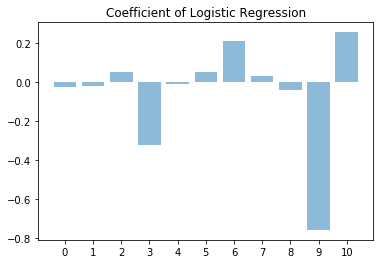

In [124]:
inf = pd.read_csv('ProPublica_COMPAS_preprocessed.csv')
X=inf.iloc[:,1:12].values
y=inf.iloc[:,12].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
'''
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  
'''

classifier = LogisticRegression(random_state = 0, C=100)
classifier.fit(X_train, y_train)
coef = classifier.coef_[0]
print ("Coefficient of Logistic Regression: ", coef)
string=['p_current_age','p_age_first_offence','p_charge','p_jail30','p_prison','p_probation','race_black','race_white','race_hispanic','race_asian','race_native']
for f in range(X_train.shape[1]):
    print("%s (%f)" % (string[f], coef[f]))
y_pos = np.arange(len(string))    
plt.bar(y_pos, coef, align='center', alpha=0.5)
plt.xticks(y_pos)
plt.title('Coefficient of Logistic Regression')
plt.show